In [1]:
#Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


THE ORIGINAL DATA

In [22]:
#Read data and create dataframe
#NOTE: file too large to open in excel

realestate_df = pd.read_csv(r"C:\Desktop\Analysis Projects\Project_4\Resources\realtor-data.zip.csv.zip")
realestate_df


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24


In [3]:
# Display the data types of the columns
column_dtypes = realestate_df.dtypes
print("Data types of columns:")
print(column_dtypes)

Data types of columns:
brokered_by       float64
status             object
price             float64
bed               float64
bath              float64
acre_lot          float64
street            float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
dtype: object


In [4]:
#Checking to see if there are duplicates in the dataset
# Count duplicate rows based on all columns
num_duplicate_rows = realestate_df.duplicated().sum()

# Display the number of duplicate rows
print(f"Number of Duplicate Rows: {num_duplicate_rows}")

Number of Duplicate Rows: 0


In [5]:
#saving the original file as csv 
# Define the file path for the CSV output
output_file_path = 'realestate_df.csv'

# Save the filtered DataFrame to a CSV file
realestate_df.to_csv(output_file_path, index=False)

In [6]:
#Previewing the dataframe from the original file
realestate_df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24


REVIEWING AND PREPARING THE DATA TO BE FILTERED 

In [7]:
# Counts by states
state_counts = realestate_df['state'].value_counts()

print("State counts:")
print(state_counts)

State counts:
Florida                 249432
California              227215
Texas                   208335
New York                103159
North Carolina           85745
Illinois                 85280
Georgia                  80977
Pennsylvania             78373
Arizona                  72825
Virginia                 68763
Washington               62461
Ohio                     59207
New Jersey               48199
Maryland                 46052
Missouri                 45145
Minnesota                43412
Michigan                 42429
Wisconsin                42390
South Carolina           42367
Tennessee                40964
Massachusetts            38041
Oklahoma                 37140
Alabama                  34053
Colorado                 32293
Oregon                   32163
Kentucky                 26316
Louisiana                25815
Arkansas                 23045
Iowa                     23033
New Mexico               21074
Indiana                  18840
Idaho                    

In [8]:
# List of unique states
unique_states = realestate_df['state'].unique()

print("Unique states:")
print(unique_states)

Unique states:
['Puerto Rico' 'Virgin Islands' 'Massachusetts' 'Connecticut'
 'New Hampshire' 'Vermont' 'New Jersey' 'New York' 'South Carolina'
 'Tennessee' 'Rhode Island' 'Virginia' 'Wyoming' 'Maine' 'Georgia'
 'Pennsylvania' 'West Virginia' 'Delaware' 'Louisiana' 'Ohio' 'California'
 'Colorado' 'Maryland' 'Missouri' 'District of Columbia' 'Wisconsin'
 'North Carolina' 'Kentucky' 'Michigan' 'Mississippi' 'Florida' 'Alabama'
 'New Brunswick' nan 'Texas' 'Arkansas' 'Idaho' 'Indiana' 'Illinois'
 'New Mexico' 'Iowa' 'Minnesota' 'South Dakota' 'Nebraska' 'North Dakota'
 'Montana' 'Oklahoma' 'Kansas' 'Oregon' 'Utah' 'Nevada' 'Washington'
 'Arizona' 'Hawaii' 'Guam' 'Alaska']


In [9]:
missing_value_counts =realestate_df.isna().sum()
print("Missing value counts per column:")
print(missing_value_counts)

Missing value counts per column:
brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64


In [10]:
#Drop the following columns" brokered_by, street
# Delete columns "brokered_by" and "street"
del realestate_df['brokered_by']
del realestate_df['street']

# Display the updated DataFrame
print(realestate_df)


           status     price  bed  bath  acre_lot        city        state  \
0        for_sale  105000.0  3.0   2.0      0.12    Adjuntas  Puerto Rico   
1        for_sale   80000.0  4.0   2.0      0.08    Adjuntas  Puerto Rico   
2        for_sale   67000.0  2.0   1.0      0.15  Juana Diaz  Puerto Rico   
3        for_sale  145000.0  4.0   2.0      0.10       Ponce  Puerto Rico   
4        for_sale   65000.0  6.0   2.0      0.05    Mayaguez  Puerto Rico   
...           ...       ...  ...   ...       ...         ...          ...   
2226377      sold  359900.0  4.0   2.0      0.33    Richland   Washington   
2226378      sold  350000.0  3.0   2.0      0.10    Richland   Washington   
2226379      sold  440000.0  6.0   3.0      0.50    Richland   Washington   
2226380      sold  179900.0  2.0   1.0      0.09    Richland   Washington   
2226381      sold  580000.0  5.0   3.0      0.31    Richland   Washington   

         zip_code  house_size prev_sold_date  
0           601.0       920.

In [11]:
# Specify columns to check for null values
columns_to_check = ['price', 'bed', 'bath', 'status', 'acre_lot','city','state','zip_code','house_size']

# Find and drop rows with null values in specified columns
realestate_df.dropna(subset=columns_to_check, inplace=True)

# Display the updated DataFrame
print(realestate_df)

           status     price  bed  bath  acre_lot           city        state  \
0        for_sale  105000.0  3.0   2.0      0.12       Adjuntas  Puerto Rico   
1        for_sale   80000.0  4.0   2.0      0.08       Adjuntas  Puerto Rico   
2        for_sale   67000.0  2.0   1.0      0.15     Juana Diaz  Puerto Rico   
3        for_sale  145000.0  4.0   2.0      0.10          Ponce  Puerto Rico   
5        for_sale  179000.0  4.0   3.0      0.46  San Sebastian  Puerto Rico   
...           ...       ...  ...   ...       ...            ...          ...   
2226377      sold  359900.0  4.0   2.0      0.33       Richland   Washington   
2226378      sold  350000.0  3.0   2.0      0.10       Richland   Washington   
2226379      sold  440000.0  6.0   3.0      0.50       Richland   Washington   
2226380      sold  179900.0  2.0   1.0      0.09       Richland   Washington   
2226381      sold  580000.0  5.0   3.0      0.31       Richland   Washington   

         zip_code  house_size prev_sold

Filtering dataset to exclude non-contiguous states and null values except for prev_sold_date.

In [12]:
# List of states to exclude (rows with these states will be removed)
states_to_exclude = ['Guam', 'Puerto Rico', 'Virgin Islands','New Brunswick','Hawaii','Alaska']

# Filter rows where state is NOT in the list of states to exclude
filtered_df = realestate_df[~realestate_df['state'].isin(states_to_exclude)]

# Display the filtered DataFrame
print(filtered_df)

           status     price  bed  bath  acre_lot      city          state  \
3403     for_sale  180000.0  2.0   1.0      0.34    Agawam  Massachusetts   
3408     for_sale  239900.0  3.0   1.0      0.46    Agawam  Massachusetts   
3409     for_sale  525000.0  3.0   3.0      0.45    Agawam  Massachusetts   
3410     for_sale  289900.0  3.0   2.0      0.36    Agawam  Massachusetts   
3413     for_sale  275000.0  4.0   2.0      0.11    Agawam  Massachusetts   
...           ...       ...  ...   ...       ...       ...            ...   
2226377      sold  359900.0  4.0   2.0      0.33  Richland     Washington   
2226378      sold  350000.0  3.0   2.0      0.10  Richland     Washington   
2226379      sold  440000.0  6.0   3.0      0.50  Richland     Washington   
2226380      sold  179900.0  2.0   1.0      0.09  Richland     Washington   
2226381      sold  580000.0  5.0   3.0      0.31  Richland     Washington   

         zip_code  house_size prev_sold_date  
3403       1001.0       676.

In [13]:
# List of unique states
unique_states = filtered_df['state'].unique()

print("Unique states:")
print(unique_states)

Unique states:
['Massachusetts' 'Connecticut' 'New Jersey' 'New York' 'New Hampshire'
 'Vermont' 'Rhode Island' 'Wyoming' 'Maine' 'Pennsylvania' 'West Virginia'
 'Delaware' 'Ohio' 'Maryland' 'Virginia' 'Colorado' 'District of Columbia'
 'North Carolina' 'Kentucky' 'South Carolina' 'Tennessee' 'Georgia'
 'Alabama' 'Florida' 'Mississippi' 'Texas' 'Missouri' 'Arkansas'
 'Louisiana' 'Indiana' 'Illinois' 'Michigan' 'Wisconsin' 'Iowa'
 'Minnesota' 'South Dakota' 'Nebraska' 'North Dakota' 'Montana' 'Idaho'
 'Kansas' 'Oklahoma' 'New Mexico' 'Utah' 'Nevada' 'Washington' 'Oregon'
 'Arizona' 'California']


CREATION OF A NEW DATAFRAME FOR DATA ANALYSIS

In [14]:
#Creation of a filtered data frame

filtered_df.dtypes

status             object
price             float64
bed               float64
bath              float64
acre_lot          float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
dtype: object

In [15]:
# Counts by states
state_counts = filtered_df['state'].value_counts()

print("State counts:")
print(state_counts)

State counts:
California              170947
Texas                   145377
Florida                 127658
Arizona                  54488
Pennsylvania             51944
New York                 50958
Georgia                  49240
Illinois                 46943
Washington               46435
Virginia                 44236
Ohio                     41195
North Carolina           37341
Maryland                 32980
Minnesota                32746
Missouri                 30157
Massachusetts            28064
Oklahoma                 26939
Michigan                 22107
Oregon                   21911
Colorado                 19544
New Jersey               19504
Wisconsin                18454
Tennessee                18310
South Carolina           17182
Iowa                     16497
Kentucky                 15749
Alabama                  14682
Louisiana                14482
New Mexico               11841
Idaho                    11603
Indiana                  11524
Arkansas                 

Saving to export new filtered dataframe as a csv file to be used in a database

In [16]:

# Define the file path for the CSV output
output_file_path = 'filtered_df.csv'

# Save the filtered DataFrame to a CSV file
filtered_df.to_csv(output_file_path, index=False)

Reading the US_GeoCode csv file, renamed column header, and export it as a csv to be used in database

In [24]:
#Read and create a dataframe for the US_GeoCodes file
# Specify the file path using raw string or escape backslashes
file_path =(r"C:\Desktop\Analysis Projects\Project_4\Resources\stateregion.csv")

# Read data from CSV file into a DataFrame
stateregion_df = pd.read_csv(file_path)

# Display the DataFrame (optional)
print(stateregion_df)



   state                  name     region            division
0     AK                Alaska       West             Pacific
1     AL               Alabama      South  East South Central
2     AR              Arkansas      South  West South Central
3     AZ               Arizona       West            Mountain
4     CA            California       West             Pacific
5     CO              Colorado       West            Mountain
6     CT           Connecticut  Northeast         New England
7     DC  District of Columbia      South      South Atlantic
8     DE              Delaware      South      South Atlantic
9     FL               Florida      South      South Atlantic
10    GA               Georgia      South      South Atlantic
11    HI                Hawaii       West             Pacific
12    IA                  Iowa    Midwest  West North Central
13    ID                 Idaho       West            Mountain
14    IL              Illinois    Midwest  East North Central
15    IN

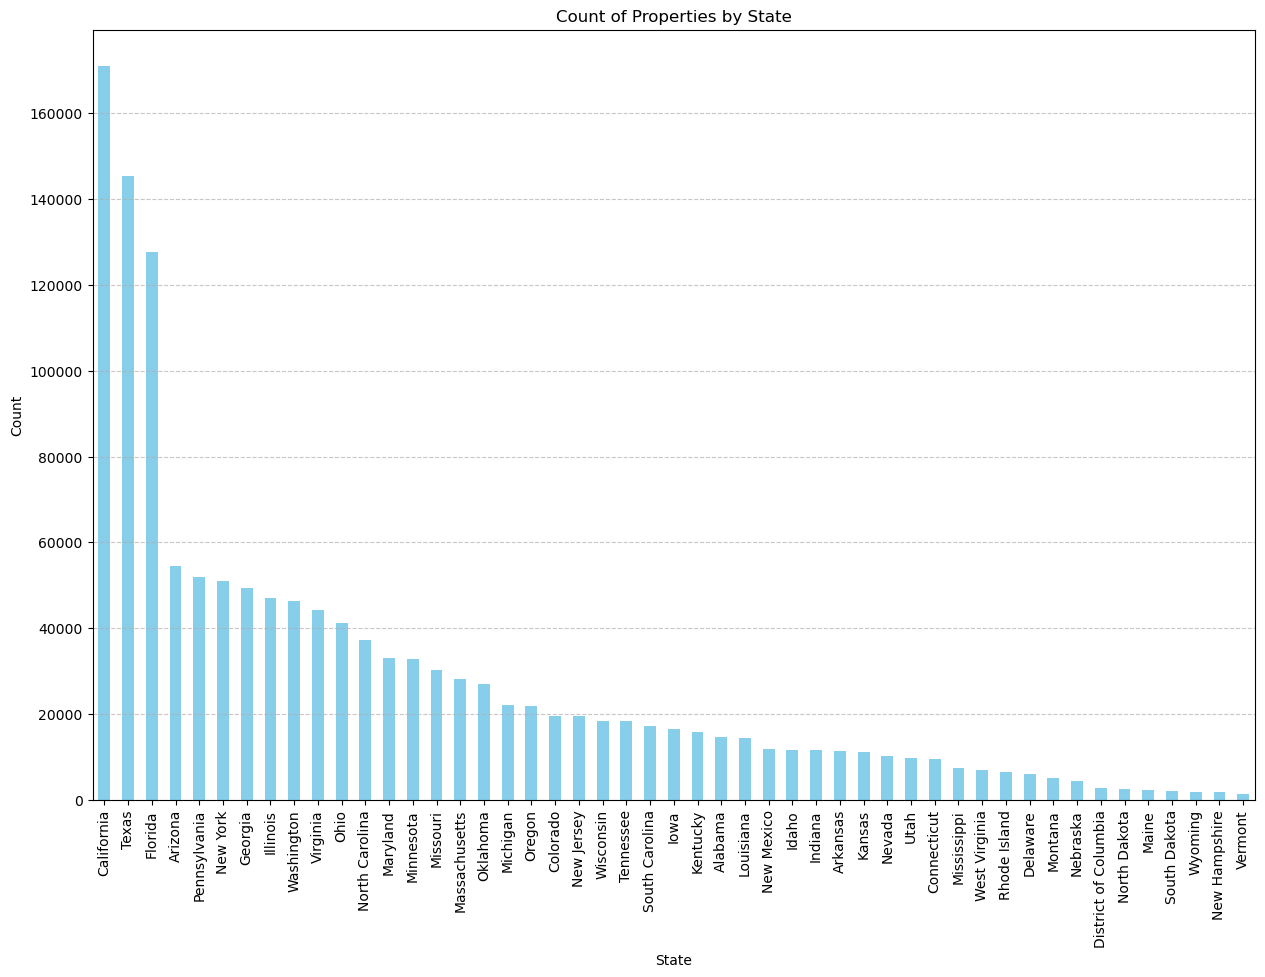

In [18]:
#DEMONSTRATING PLOTTING THE STATES COUNT IN A BAR CHART ORDERED BY STATE COUNTS

state_counts = filtered_df['state'].value_counts()

# Plotting the state counts as a bar chart using Matplotlib
plt.figure(figsize=(15, 10))  # Set the figure size (width, height) in inches

state_counts.plot(kind='bar', color='skyblue')  # Plotting a bar chart
plt.title('Count of Properties by State')  # Adding a title to the plot
plt.xlabel('State')  # Adding label to x-axis
plt.ylabel('Count')  # Adding label to y-axis
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines to y-axis

plt.show()  # Display the plot

MERGING THE REGION AND DIVISION COLUMNS TO THE FILTERED TABLE TO CREATE CHARTS

In [19]:
# Merge 'realestate_filtered' with 'stateregion' on 'state' column
# Merge based on different column names: 'state' in realestate_filtered and 'name' in stateregion
#merged_df = pd.merge(filtered_df, stateregion_df[['region','division']], left_on='state', right_on='name', how='left')

stateregion_subset = stateregion_df[['name', 'region', 'division']]
merged_df = pd.merge(filtered_df, stateregion_subset, left_on='state', right_on='name', how='left')
merged_df.drop('name', axis=1, inplace=True)

# Display the merged dataframe
print(merged_df)



           status     price  bed  bath  acre_lot      city          state  \
0        for_sale  180000.0  2.0   1.0      0.34    Agawam  Massachusetts   
1        for_sale  239900.0  3.0   1.0      0.46    Agawam  Massachusetts   
2        for_sale  525000.0  3.0   3.0      0.45    Agawam  Massachusetts   
3        for_sale  289900.0  3.0   2.0      0.36    Agawam  Massachusetts   
4        for_sale  275000.0  4.0   2.0      0.11    Agawam  Massachusetts   
...           ...       ...  ...   ...       ...       ...            ...   
1353428      sold  359900.0  4.0   2.0      0.33  Richland     Washington   
1353429      sold  350000.0  3.0   2.0      0.10  Richland     Washington   
1353430      sold  440000.0  6.0   3.0      0.50  Richland     Washington   
1353431      sold  179900.0  2.0   1.0      0.09  Richland     Washington   
1353432      sold  580000.0  5.0   3.0      0.31  Richland     Washington   

         zip_code  house_size prev_sold_date     region     division  
0   

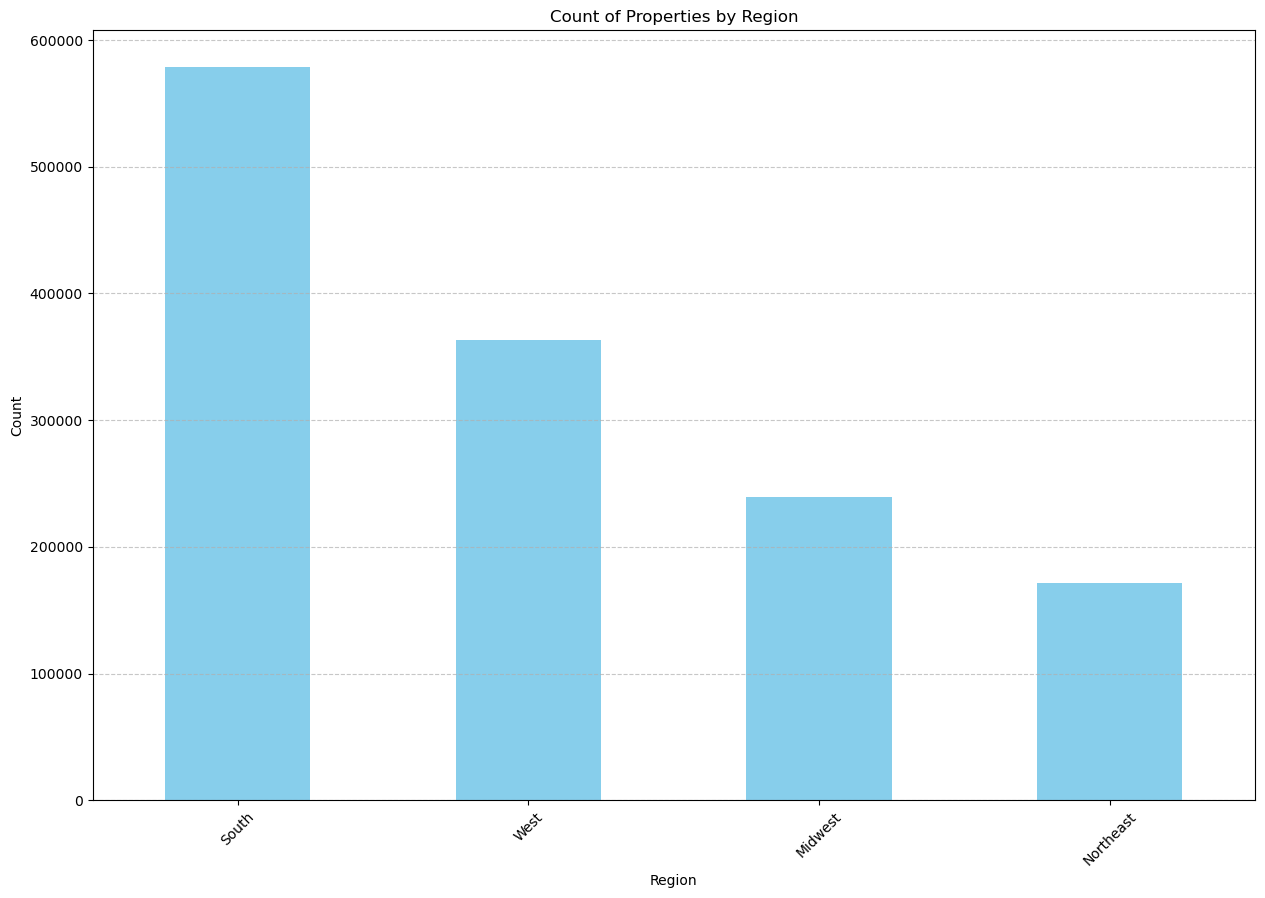

In [20]:
region_counts = merged_df['region'].value_counts()

# Plotting the state counts as a bar chart using Matplotlib
plt.figure(figsize=(15, 10))  # Set the figure size (width, height) in inches

region_counts.plot(kind='bar', color='skyblue')  # Plotting a bar chart
plt.title('Count of Properties by Region')  # Adding a title to the plot
plt.xlabel('Region')  # Adding label to x-axis
plt.ylabel('Count')  # Adding label to y-axis
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines to y-axis

plt.show()  # Display the plot

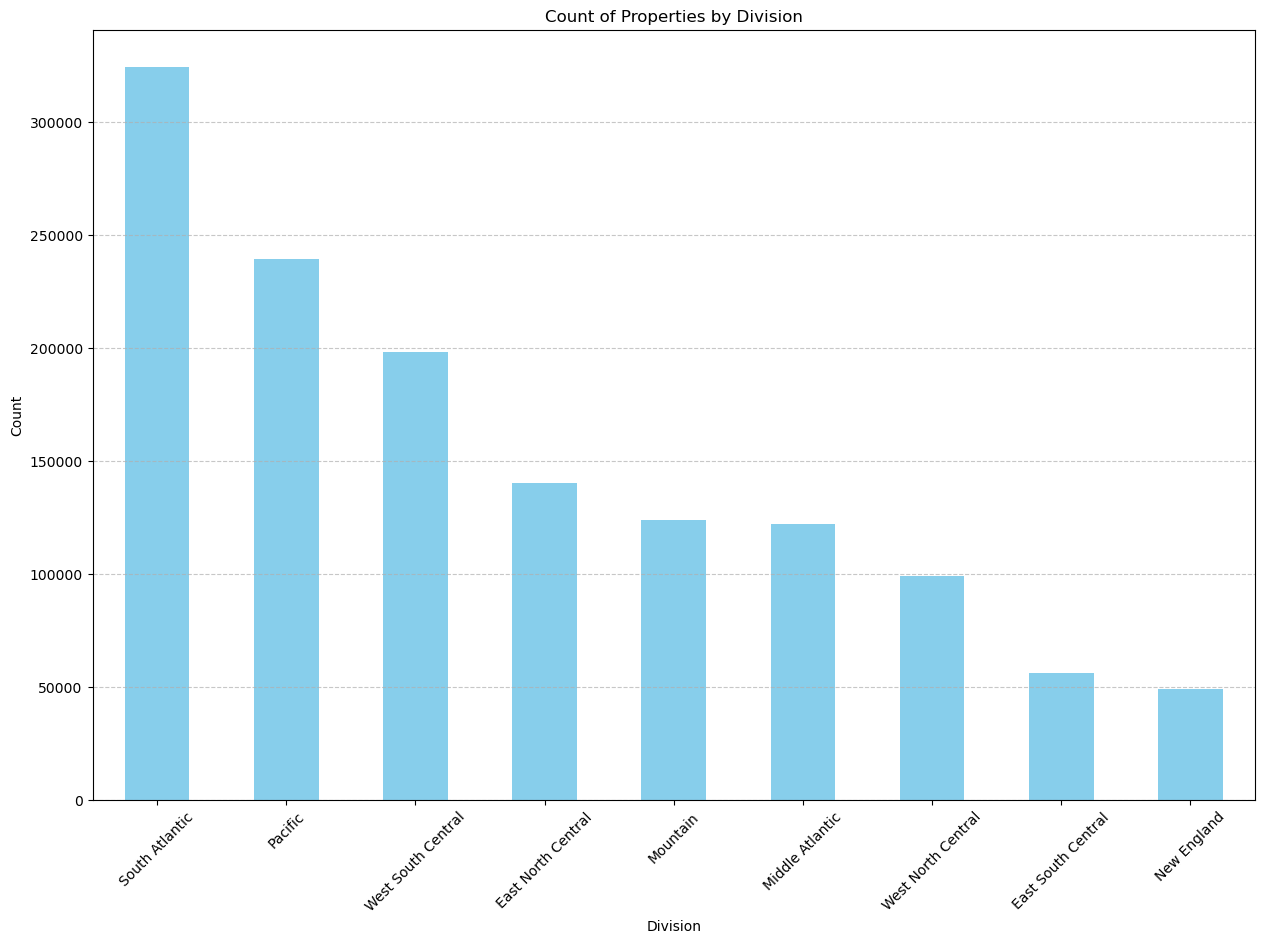

In [21]:
division_counts = merged_df['division'].value_counts()

# Plotting the division counts as a bar chart using Matplotlib
plt.figure(figsize=(15, 10))  # Set the figure size (width, height) in inches

division_counts.plot(kind='bar', color='skyblue')  # Plotting a bar chart
plt.title('Count of Properties by Division')  # Adding a title to the plot
plt.xlabel('Division')  # Adding label to x-axis
plt.ylabel('Count')  # Adding label to y-axis
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines to y-axis

plt.show()  # Display the plot